In [1]:
# 引入一些包
import pandas as pd 
import numpy as np
%matplotlib inline
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 读入处理后的CSV文件
path = 'I:/old_cars/EDA/'
# Train_data = pd.read_csv(path + 'used_car_train_20200313.csv', sep=' ')
df = pd.read_csv(path + 'pre_data.csv')

In [3]:
#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)
#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',100)

In [4]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '1'

In [5]:
train = df[~df['price'].isnull()].reset_index(drop=True)
test = df[df['price'].isnull()].reset_index(drop=True)

In [6]:
df.columns

Index(['SaleID', 'bodyType', 'brand', 'fuelType', 'gearbox', 'kilometer',
       'model', 'notRepairedDamage', 'power', 'price', 'price_boxcox', 'v_0',
       'v_1', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14', 'v_2', 'v_3', 'v_4',
       'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'city', 'used_time'],
      dtype='object')

1、数值特征进行分桶；
2、查看分布，如果奇怪先进行转换，再归一化处理；
3、构造统计量特征；
4、类别特征进行编码

In [7]:
cate_fea = ['bodyType','brand','fuelType','gearbox','model','notRepairedDamage']
num_fea = ['kilometer','power','used_time'] + ['v_{}'.format(i+8) for i in range(7)]+ ['v_0','v_2','v_3','v_5','v_6']

In [8]:
train.describe()

,SaleID,bodyType,brand,fuelType,gearbox,kilometer,model,notRepairedDamage,power,price,price_boxcox,v_0,v_1,v_10,v_11,v_12,v_13,v_14,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,city,used_time
count,148990.000000,144497.000000,148990.000000,140332.000000,143027.000000,148990.000000,148990.000000,124749.000000,148847.000000,148990.000000,148990.000000,148990.000000,148990.000000,148990.000000,148990.000000,148990.000000,148990.000000,148990.000000,148990.000000,148990.000000,148990.000000,148990.000000,148990.000000,148990.000000,148990.000000,148990.000000,148990.000000,148990.000000
mean,74999.121230,1.774881,7.954145,0.374719,0.223119,12.603856,46.144520,0.114245,115.904210,5873.570636,11.465067,44.385583,-0.047049,0.010518,0.021665,-0.013469,-0.006016,0.028289,0.079933,0.093681,0.007496,0.248173,0.044882,0.124976,0.057919,0.061678,37.242573,4572.074518
std,43297.588279,1.743659,7.739582,0.547587,0.416339,3.917298,48.166947,0.318110,67.931861,7461.465952,2.333976,2.448361,3.639476,3.769600,3.286309,2.512212,1.283914,0.979212,2.934321,2.022307,1.185135,0.045873,0.051706,0.201737,0.029100,0.035441,21.472258,1959.583939
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,11.000000,2.648000,30.450000,-4.297000,-9.170000,-5.560000,-9.640000,-4.152000,-3.742000,-4.470000,-5.816000,-4.363000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,276.700000
25%,37518.250000,0.000000,1.000000,0.000000,0.000000,12.500000,10.000000,0.000000,75.000000,1300.000000,9.760000,43.120000,-3.191000,-3.710000,-1.940000,-1.882750,-1.060000,-0.421900,-0.972700,-1.438000,-0.926300,0.243700,0.000035,0.062600,0.035200,0.033780,20.000000,3200.400000
50%,74990.500000,1.000000,6.000000,0.000000,0.000000,15.000000,29.000000,0.000000,109.000000,3200.000000,11.440000,44.600000,-3.053000,1.638000,-0.348100,-0.150600,-0.040740,0.147750,-0.386000,0.116760,-0.084170,0.257800,0.000810,0.096085,0.056760,0.058200,32.000000,4666.400000
75%,112494.750000,3.000000,13.000000,1.000000,0.000000,15.000000,65.000000,0.000000,150.000000,7550.000000,13.160000,45.970000,3.998000,2.852000,1.264000,1.750000,0.936500,0.684600,0.238300,1.576000,0.859000,0.265400,0.102000,0.125400,0.079040,0.087200,50.000000,6126.100000
max,149999.000000,7.000000,39.000000,6.000000,1.000000,15.000000,247.000000,1.000000,600.000000,99999.000000,19.120000,52.300000,7.300000,12.360000,18.810000,13.850000,5.250000,2.744000,19.030000,9.850000,4.960000,0.291700,0.150400,1.405000,0.160800,0.213600,99.000000,9137.200000


In [9]:
df.describe()

,SaleID,bodyType,brand,fuelType,gearbox,kilometer,model,notRepairedDamage,power,price,price_boxcox,v_0,v_1,v_10,v_11,v_12,v_13,v_14,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,city,used_time
count,198990.000000,193084.000000,198990.000000,187439.000000,191117.000000,198990.000000,198990.000000,166718.000000,198777.000000,148990.000000,148990.000000,198990.000000,198990.000000,198990.00000,198990.000000,198990.000000,198990.000000,198990.000000,198990.000000,198990.000000,198990.000000,198990.000000,198990.000000,198990.000000,198990.000000,198990.000000,198990.000000,198990.000000
mean,100126.107201,1.776719,7.979798,0.374388,0.223429,12.601776,46.320408,0.113797,116.015565,5873.570636,11.465067,44.393790,-0.044584,0.00339,0.012768,-0.013490,-0.005295,0.021562,0.072545,0.091409,0.009381,0.248298,0.044917,0.124415,0.057939,0.061759,37.257400,4572.282703
std,57769.626926,1.747970,7.759841,0.547298,0.416544,3.915201,48.498367,0.317565,67.996479,7461.465952,2.333976,2.443782,3.640243,3.76419,3.272592,2.513149,1.284586,0.991596,2.914941,2.023363,1.187124,0.045557,0.051721,0.200305,0.029127,0.035495,21.460703,1960.078085
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,11.000000,2.648000,28.980000,-4.297000,-9.17000,-5.560000,-9.640000,-4.152000,-6.113000,-4.470000,-5.816000,-4.363000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.500000
25%,50097.250000,0.000000,1.000000,0.000000,0.000000,12.500000,10.000000,0.000000,75.000000,1300.000000,9.760000,43.120000,-3.191000,-3.70700,-1.948000,-1.882000,-1.060000,-0.425800,-0.972000,-1.442000,-0.927000,0.243700,0.000038,0.062600,0.035160,0.033750,20.000000,3200.500000
50%,100166.500000,1.000000,6.000000,0.000000,0.000000,15.000000,29.000000,0.000000,109.000000,3200.000000,11.440000,44.600000,-3.053000,1.63300,-0.349900,-0.148600,-0.039535,0.145500,-0.386500,0.111760,-0.081000,0.257800,0.000812,0.096000,0.056820,0.058350,32.000000,4666.300000
75%,150251.750000,3.000000,13.000000,1.000000,0.000000,15.000000,65.000000,0.000000,150.000000,7550.000000,13.160000,45.970000,3.998000,2.84800,1.264000,1.754000,0.937875,0.683600,0.238600,1.572000,0.860000,0.265400,0.102000,0.125400,0.079040,0.087300,50.000000,6126.100000
max,199999.000000,7.000000,39.000000,6.000000,1.000000,15.000000,247.000000,1.000000,600.000000,99999.000000,19.120000,52.300000,7.555000,12.36000,18.860000,13.850000,5.914000,2.744000,19.030000,9.850000,5.270000,0.291700,0.153300,1.405000,0.160800,0.214700,99.000000,9137.300000


In [10]:
test.describe()

,SaleID,bodyType,brand,fuelType,gearbox,kilometer,model,notRepairedDamage,power,price,price_boxcox,v_0,v_1,v_10,v_11,v_12,v_13,v_14,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,city,used_time
count,50000.000000,48587.000000,50000.000000,47107.000000,48090.000000,50000.000000,50000.000000,41969.000000,49930.000000,0.0,0.0,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,174999.500000,1.782185,8.056240,0.373405,0.224350,12.595580,46.844520,0.112464,116.347527,NaN,NaN,44.418242,-0.037238,-0.017852,-0.013742,-0.013555,-0.003147,0.001516,0.050532,0.084639,0.015000,0.248670,0.045021,0.122744,0.057997,0.062000,37.301580,4572.903050
std,14433.901067,1.760736,7.819477,0.546442,0.417158,3.908979,49.469548,0.315940,68.188351,NaN,NaN,2.429948,3.642553,3.747980,3.231262,2.515964,1.286596,1.027361,2.856330,2.026510,1.193025,0.044601,0.051766,0.195968,0.029211,0.035653,21.426389,1961.569276
min,150000.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,NaN,NaN,28.980000,-4.137000,-9.160000,-5.410000,-8.914000,-4.125000,-6.113000,-4.207000,-5.637000,-4.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.500000
25%,162499.750000,0.000000,1.000000,0.000000,0.000000,12.500000,10.000000,0.000000,75.000000,NaN,NaN,43.120000,-3.191000,-3.700000,-1.972000,-1.877000,-1.061000,-0.438000,-0.971000,-1.453000,-0.928000,0.243800,0.000044,0.062600,0.035100,0.033720,20.000000,3202.700000
50%,174999.500000,1.000000,6.000000,0.000000,0.000000,15.000000,29.000000,0.000000,109.000000,NaN,NaN,44.620000,-3.050000,1.613000,-0.355850,-0.142800,-0.035965,0.138800,-0.388200,0.097900,-0.070225,0.257800,0.000815,0.095800,0.057085,0.058780,32.000000,4666.100000
75%,187499.250000,3.000000,13.000000,1.000000,0.000000,15.000000,65.000000,0.000000,150.000000,NaN,NaN,46.000000,3.998000,2.832000,1.263000,1.765000,0.941400,0.681000,0.240525,1.562500,0.864000,0.265400,0.102050,0.125500,0.079100,0.087460,50.000000,6126.100000
max,199999.000000,7.000000,39.000000,6.000000,1.000000,15.000000,246.000000,1.000000,600.000000,NaN,NaN,51.750000,7.555000,12.336000,18.860000,12.950000,5.914000,2.625000,18.390000,9.380000,5.270000,0.291500,0.153300,1.358000,0.156400,0.214700,99.000000,9137.300000


（v1、6、10）（v4、9、13）（v2、5、7）（v3、8）

由于v1与v6相关性0.999，故删去v1；
由于v4与v9相关性0.963，故删去v4；
由于v2与v7先关心0.974，故删去v7；

min、max、mean
等距分桶

power:【0, 600, 116】分桶10个：bins = [i*60 for i in range(11)]

kilometer：【0.5, 15, 12.6】   bins = [i*1.5 for i in range(11)]

used_time：【24.5， 9137.3， 4572.3】  bins = [i*920 for i in range(11)]

In [18]:
# 数据分桶 以 power 为例
# 这时候我们的缺失值也进桶了，
# 为什么要做数据分桶呢，原因有很多，= =
# 1. 离散后稀疏向量内积乘法运算速度更快，计算结果也方便存储，容易扩展；
# 2. 离散后的特征对异常值更具鲁棒性，如 age>30 为 1 否则为 0，对于年龄为 200 的也不会对模型造成很大的干扰；
# 3. LR 属于广义线性模型，表达能力有限，经过离散化后，每个变量有单独的权重，这相当于引入了非线性，能够提升模型的表达能力，加大拟合；
# 4. 离散后特征可以进行特征交叉，提升表达能力，由 M+N 个变量编程 M*N 个变量，进一步引入非线形，提升了表达能力；
# 5. 特征离散后模型更稳定，如用户年龄区间，不会因为用户年龄长了一岁就变化

# 当然还有很多原因，LightGBM 在改进 XGBoost 时就增加了数据分桶，增强了模型的泛化性
bin_col = []
bin_fea = ['power','kilometer','used_time']
sc = [60,1.5,920]
for j in range(3):
    bin = [i*sc[j] for i in range(11)]
    df[bin_fea[j] + '_bin'] = pd.cut(df[bin_fea[j]], bin, labels=False)
    bin_col.append(bin_fea[j] + '_bin')
    

In [19]:
df[['power_bin','kilometer_bin', 'used_time_bin']].head()

,power_bin,kilometer_bin,used_time_bin
0,0.0,8,4
1,NaN,9,5
2,2.0,8,4
3,3.0,9,7
4,1.0,3,1


In [20]:
# 或 os.environ["CUDA_VISIBLE_DEVICES"] = "0,2,3" 
df.head()

,SaleID,bodyType,brand,fuelType,gearbox,kilometer,model,notRepairedDamage,power,price,price_boxcox,v_0,v_1,v_10,v_11,v_12,v_13,v_14,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,city,used_time,power_bin,kilometer_bin,used_time_bin
0,0,1.0,6,0.0,0.0,12.5,30.0,0.0,60.0,1850.0,10.400,43.34,3.967,-2.880,2.8050,-2.420,0.7954,0.9146,0.05026,2.1600,1.144,0.2357,0.10200,0.12950,0.02281,0.09750,10,4380.1,0.0,8,4
1,1,2.0,1,0.0,0.0,15.0,40.0,NaN,0.0,3600.0,11.664,45.30,5.234,-4.902,2.0960,-1.030,-1.7230,0.2455,0.13800,1.3810,-1.422,0.2650,0.12103,0.13570,0.02660,0.02058,43,4745.2,NaN,9,5
2,2,1.0,15,0.0,0.0,12.5,115.0,0.0,163.0,6222.0,12.760,45.97,4.824,-4.848,1.8040,1.565,-0.8325,-0.2300,1.31900,-0.9985,-0.997,0.2515,0.11490,0.16520,0.06216,0.02707,28,4319.1,2.0,8,4
3,3,0.0,10,0.0,1.0,15.0,109.0,0.0,193.0,2400.0,10.880,45.70,4.492,-4.508,1.2860,-0.502,-2.4380,-0.4788,-0.05063,0.8840,-2.229,0.2744,0.11030,0.12195,0.03340,0.00000,43,7221.0,3.0,9,7
4,4,1.0,5,0.0,0.0,5.0,110.0,0.0,68.0,5200.0,12.390,44.38,2.031,-1.896,0.9106,0.931,2.8340,1.9240,0.57230,-1.5710,2.246,0.2280,0.07320,0.09186,0.07880,0.12150,69,1466.4,1.0,3,1


In [21]:
df1 = df.drop(['v_1','v_4','v_7'], axis=1)

In [22]:
df1.columns

Index(['SaleID', 'bodyType', 'brand', 'fuelType', 'gearbox', 'kilometer',
       'model', 'notRepairedDamage', 'power', 'price', 'price_boxcox', 'v_0',
       'v_10', 'v_11', 'v_12', 'v_13', 'v_14', 'v_2', 'v_3', 'v_5', 'v_6',
       'v_8', 'v_9', 'city', 'used_time', 'power_bin', 'kilometer_bin',
       'used_time_bin'],
      dtype='object')

In [24]:
bin_col

['power_bin', 'kilometer_bin', 'used_time_bin']

df1 = pd.get_dummies(df1, columns=['model', 'brand', 'bodyType', 'fuelType',
                                     'gearbox', 'notRepairedDamage','city','power_bin','kilometer_bin','used_time_bin'])

In [25]:
from sklearn.model_selection import KFold
from tqdm import tqdm

train_df = df1[~df1['price'].isnull()].reset_index(drop=True)
test_df = df1[df1['price'].isnull()].reset_index(drop=True)


### target encoding目标编码，回归场景相对来说做目标编码的选择更多，不仅可以做均值编码，还可以做标准差编码、中位数编码等
enc_cols = []
stats_default_dict = {
    'max': train_df['price'].max(),
    'min': train_df['price'].min(),
    'median': train_df['price'].median(),
    'mean': train_df['price'].mean(),
    'sum': train_df['price'].sum(),
    'std': train_df['price'].std(),
    'skew': train_df['price'].skew(),
    'kurt': train_df['price'].kurt(),
    'mad': train_df['price'].mad()
}
### 暂且选择这三种编码
enc_stats = ['mean','median','sum','std','mad']
skf = KFold(n_splits=5, shuffle=True, random_state=2020)
for f in tqdm(cate_fea):
    enc_dict = {}
    for stat in enc_stats:
        enc_dict['{}_target_{}'.format(f, stat)] = stat
        train_df['{}_target_{}'.format(f, stat)] = 0
        test_df['{}_target_{}'.format(f, stat)] = 0
        enc_cols.append('{}_target_{}'.format(f, stat))
    # skf.split()返回索引的迭代器        
    for i, (trn_idx, val_idx) in enumerate(skf.split(train_df, train_df['price'])):
        trn_x, val_x = train_df.iloc[trn_idx].reset_index(drop=True), train_df.iloc[val_idx].reset_index(drop=True)
        enc_df = trn_x.groupby(f, as_index=False)['price'].agg(enc_dict)
        val_x = val_x[[f]].merge(enc_df, on=f, how='left')
        test_x = test_df[[f]].merge(enc_df, on=f, how='left')
        for stat in enc_stats:
            val_x['{}_target_{}'.format(f, stat)] = val_x['{}_target_{}'.format(f, stat)].fillna(stats_default_dict[stat])
            test_x['{}_target_{}'.format(f, stat)] = test_x['{}_target_{}'.format(f, stat)].fillna(stats_default_dict[stat])
            train_df.loc[val_idx, '{}_target_{}'.format(f, stat)] = val_x['{}_target_{}'.format(f, stat)].values
            test_df['{}_target_{}'.format(f, stat)] += test_x['{}_target_{}'.format(f, stat)].values / skf.n_splits


cols = cate_fea + num_fea + bin_col + enc_cols
sub = test_df[['SaleID']].copy()
test_df = test_df[cols]
labels = train_df['price'].values
train_df = train_df[cols]
print(train_df.shape)
train_df.head()

100%|████████████████████████████████████████████| 6/6 [00:11<00:00,  1.98s/it]

(148990, 54)


,bodyType,brand,fuelType,gearbox,model,notRepairedDamage,kilometer,power,used_time,v_8,v_9,v_10,v_11,v_12,v_13,v_14,v_0,v_2,v_3,v_5,v_6,power_bin,kilometer_bin,used_time_bin,bodyType_target_mean,bodyType_target_median,bodyType_target_sum,bodyType_target_std,bodyType_target_mad,brand_target_mean,brand_target_median,brand_target_sum,brand_target_std,brand_target_mad,fuelType_target_mean,fuelType_target_median,fuelType_target_sum,fuelType_target_std,fuelType_target_mad,gearbox_target_mean,gearbox_target_median,gearbox_target_sum,gearbox_target_std,gearbox_target_mad,model_target_mean,model_target_median,model_target_sum,model_target_std,model_target_mad,notRepairedDamage_target_mean,notRepairedDamage_target_median,notRepairedDamage_target_sum,notRepairedDamage_target_std,notRepairedDamage_target_mad
0,1.0,6,0.0,0.0,30.0,0.0,12.5,60.0,4380.1,0.02281,0.09750,-2.880,2.8050,-2.420,0.7954,0.9146,43.34,0.05026,2.1600,0.2357,0.10200,0.0,8,4,2753.838229,1600.0,77437931.0,3074.677110,2166.727340,3595.692952,1800.0,29182644.0,4589.135585,3157.549632,4764.663332,2380.0,347243899.0,6874.919811,4208.264843,4681.196852,2700.0,415774542.0,5606.571923,3795.092468,2744.173772,1600.0,5084954.0,2995.637300,2262.766936,6917.435026,4200.0,612435110.0,7986.284527,5419.946979
1,2.0,1,0.0,0.0,40.0,NaN,15.0,0.0,4745.2,0.02660,0.02058,-4.902,2.0960,-1.030,-1.7230,0.2455,45.30,0.13800,1.3810,0.2650,0.12103,NaN,9,5,5764.647750,3500.0,139775414.0,6290.842994,4521.703730,9291.300882,6500.0,102213601.0,9395.993849,6926.110609,4738.091210,2300.0,345965944.0,6860.062294,4191.195267,4657.186824,2700.0,413958708.0,5597.787646,3778.428428,6815.316643,4900.0,24364757.0,6331.239592,4766.764000,5873.570636,3200.0,875103289.0,7461.465952,4955.641682
2,1.0,15,0.0,0.0,115.0,0.0,12.5,163.0,4319.1,0.06216,0.02707,-4.848,1.8040,1.565,-0.8325,-0.2300,45.97,1.31900,-0.9985,0.2515,0.11490,2.0,8,4,2753.838229,1600.0,77437931.0,3074.677110,2166.727340,9869.936986,8500.0,10807581.0,5579.138743,4475.424272,4764.663332,2380.0,347243899.0,6874.919811,4208.264843,4681.196852,2700.0,415774542.0,5606.571923,3795.092468,10969.935705,9750.0,8019023.0,5896.813694,4828.830573,6917.435026,4200.0,612435110.0,7986.284527,5419.946979
3,0.0,10,0.0,1.0,109.0,0.0,15.0,193.0,7221.0,0.03340,0.00000,-4.508,1.2860,-0.502,-2.4380,-0.4788,45.70,-0.05063,0.8840,0.2744,0.11030,3.0,9,7,6050.058362,3450.0,199760827.0,7084.134904,4934.813254,8465.975711,5490.0,95851777.0,8935.459710,6416.840150,4781.692791,2350.0,348810144.0,6942.295835,4235.086280,10569.459115,7294.0,269373235.0,10796.075474,7771.047723,13164.290625,8945.0,4212573.0,12360.691602,8921.726582,6945.450016,4200.0,613338800.0,8041.343056,5439.427389
4,1.0,5,0.0,0.0,110.0,0.0,5.0,68.0,1466.4,0.07880,0.12150,-1.896,0.9106,0.931,2.8340,1.9240,44.38,0.57230,-1.5710,0.2280,0.07320,1.0,3,1,2793.253860,1600.0,78694341.0,3168.905910,2209.491472,3282.921409,2300.0,12113980.0,3296.412317,2288.931950,4769.538288,2350.0,347050684.0,6891.107192,4214.929537,4687.231864,2700.0,416479300.0,5623.243568,3804.630671,1577.877069,890.0,667442.0,1536.621415,1257.870429,6927.513436,4200.0,612516883.0,7999.428995,5425.925238


数值特征多项式构造

In [35]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148990 entries, 0 to 148989
Data columns (total 54 columns):
bodyType                           144497 non-null float64
brand                              148990 non-null int64
fuelType                           140332 non-null float64
gearbox                            143027 non-null float64
model                              148990 non-null float64
notRepairedDamage                  124749 non-null float64
kilometer                          148990 non-null float64
power                              148847 non-null float64
used_time                          148990 non-null float64
v_8                                148990 non-null float64
v_9                                148990 non-null float64
v_10                               148990 non-null float64
v_11                               148990 non-null float64
v_12                               148990 non-null float64
v_13                               148990 non-null float64
v_14  

In [42]:
from sklearn.preprocessing import PolynomialFeatures
# 选取特征
col_numbers = ['kilometer','power','used_time','v_0','v_2','v_5','v_6','v_9','v_10','v_11','v_12','v_14']
# 由于特征构造不允许空值，故这里对power进行填充   
train_df['power'].fillna(train['power'].median(),inplace=True)

In [43]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148990 entries, 0 to 148989
Data columns (total 54 columns):
bodyType                           144497 non-null float64
brand                              148990 non-null int64
fuelType                           140332 non-null float64
gearbox                            143027 non-null float64
model                              148990 non-null float64
notRepairedDamage                  124749 non-null float64
kilometer                          148990 non-null float64
power                              148990 non-null float64
used_time                          148990 non-null float64
v_8                                148990 non-null float64
v_9                                148990 non-null float64
v_10                               148990 non-null float64
v_11                               148990 non-null float64
v_12                               148990 non-null float64
v_13                               148990 non-null float64
v_14  

In [44]:
train_df['power'].isnull().sum()

0

In [56]:
rest_df = train_df[['kilometer','power','used_time','v_0','v_2','v_5','v_6','v_9','v_10','v_11','v_12','v_14']]

In [57]:
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148990 entries, 0 to 148989
Data columns (total 12 columns):
kilometer    148990 non-null float64
power        148990 non-null float64
used_time    148990 non-null float64
v_0          148990 non-null float64
v_2          148990 non-null float64
v_5          148990 non-null float64
v_6          148990 non-null float64
v_9          148990 non-null float64
v_10         148990 non-null float64
v_11         148990 non-null float64
v_12         148990 non-null float64
v_14         148990 non-null float64
dtypes: float64(12)
memory usage: 13.6 MB


In [61]:
col1 = ['kilometer','power','used_time','v_0','v_2','v_5','v_6','v_9','v_10','v_11','v_12','v_14']

In [63]:
poly_transform = PolynomialFeatures(degree=2,interaction_only=False,include_bias=False)
poly_features = pd.DataFrame(poly_transform.fit_transform(rest_df), columns=poly_transform.get_feature_names(col1))
# for col in poly_features.columns:
#     rest_df.insert(1,col,poly_features[col])

In [65]:
poly_features.head()

,kilometer,power,used_time,v_0,v_2,v_5,v_6,v_9,v_10,v_11,v_12,v_14,kilometer^2,kilometer power,kilometer used_time,kilometer v_0,kilometer v_2,kilometer v_5,kilometer v_6,kilometer v_9,kilometer v_10,kilometer v_11,kilometer v_12,kilometer v_14,power^2,power used_time,power v_0,power v_2,power v_5,power v_6,power v_9,power v_10,power v_11,power v_12,power v_14,used_time^2,used_time v_0,used_time v_2,used_time v_5,used_time v_6,used_time v_9,used_time v_10,used_time v_11,used_time v_12,used_time v_14,v_0^2,v_0 v_2,v_0 v_5,v_0 v_6,v_0 v_9,v_0 v_10,v_0 v_11,v_0 v_12,v_0 v_14,v_2^2,v_2 v_5,v_2 v_6,v_2 v_9,v_2 v_10,v_2 v_11,v_2 v_12,v_2 v_14,v_5^2,v_5 v_6,v_5 v_9,v_5 v_10,v_5 v_11,v_5 v_12,v_5 v_14,v_6^2,v_6 v_9,v_6 v_10,v_6 v_11,v_6 v_12,v_6 v_14,v_9^2,v_9 v_10,v_9 v_11,v_9 v_12,v_9 v_14,v_10^2,v_10 v_11,v_10 v_12,v_10 v_14,v_11^2,v_11 v_12,v_11 v_14,v_12^2,v_12 v_14,v_14^2
0,12.5,60.0,4380.1,43.34,0.05026,0.2357,0.10200,0.09750,-2.880,2.8050,-2.420,0.9146,156.25,750.0,54751.25,541.750,0.62825,2.94625,1.27500,1.218750,-36.00,35.0625,-30.2500,11.4325,3600.0,262806.0,2600.40,3.01560,14.1420,6.1200,5.85000,-172.800,168.3000,-145.200,54.8760,19185276.01,189833.534,220.143826,1032.38957,446.770200,427.059750,-12614.6880,12286.18050,-10599.8420,4006.03946,1878.3556,2.178268,10.215238,4.420680,4.225650,-124.81920,121.568700,-104.88280,39.638764,0.002526,0.011846,0.005127,0.004900,-0.144749,0.140979,-0.121629,0.045968,0.055554,0.024041,0.022981,-0.678816,0.661138,-0.570394,0.215571,0.010404,0.009945,-0.293760,0.286110,-0.246840,0.093289,0.009506,-0.280800,0.273488,-0.235950,0.089174,8.294400,-8.078400,6.969600,-2.634048,7.868025,-6.788100,2.565453,5.856400,-2.213332,0.836493
1,15.0,0.0,4745.2,45.30,0.13800,0.2650,0.12103,0.02058,-4.902,2.0960,-1.030,0.2455,225.00,0.0,71178.00,679.500,2.07000,3.97500,1.81545,0.308700,-73.53,31.4400,-15.4500,3.6825,0.0,0.0,0.00,0.00000,0.0000,0.0000,0.00000,-0.000,0.0000,-0.000,0.0000,22516923.04,214957.560,654.837600,1257.47800,574.311556,97.656216,-23260.9704,9945.93920,-4887.5560,1164.94660,2052.0900,6.251400,12.004500,5.482659,0.932274,-222.06060,94.948800,-46.65900,11.121150,0.019044,0.036570,0.016702,0.002840,-0.676476,0.289248,-0.142140,0.033879,0.070225,0.032073,0.005454,-1.299030,0.555440,-0.272950,0.065058,0.014648,0.002491,-0.593289,0.253679,-0.124661,0.029713,0.000424,-0.100883,0.043136,-0.021197,0.005052,24.029604,-10.274592,5.049060,-1.203441,4.393216,-2.158880,0.514568,1.060900,-0.252865,0.060270
2,12.5,163.0,4319.1,45.97,1.31900,0.2515,0.11490,0.02707,-4.848,1.8040,1.565,-0.2300,156.25,2037.5,53988.75,574.625,16.48750,3.14375,1.43625,0.338375,-60.60,22.5500,19.5625,-2.8750,26569.0,704013.3,7493.11,214.99700,40.9945,18.7287,4.41241,-790.224,294.0520,255.095,-37.4900,18654624.81,198549.027,5696.892900,1086.25365,496.264590,116.918037,-20938.9968,7791.65640,6759.3915,-993.39300,2113.2409,60.634430,11.561455,5.281953,1.244408,-222.86256,82.929880,71.94305,-10.573100,1.739761,0.331728,0.151553,0.035705,-6.394512,2.379476,2.064235,-0.303370,0.063252,0.028897,0.006808,-1.219272,0.453706,0.393597,-0.057845,0.013202,0.003110,-0.557035,0.207280,0.179818,-0.026427,0.000733,-0.131235,0.048834,0.042365,-0.006226,23.503104,-8.745792,-7.587120,1.115040,3.254416,2.823260,-0.414920,2.449225,-0.359950,0.052900
3,15.0,193.0,7221.0,45.70,-0.05063,0.2744,0.11030,0.00000,-4.508,1.2860,-0.502,-0.4788,225.00,2895.0,108315.00,685.500,-0.75945,4.11600,1.65450,0.000000,-67.62,19.2900,-7.5300,-7.1820,37249.0,1393653.0,8820.10,-9.77159,52.9592,21.2879,0.00000,-870.044,248.1980,-96.886,-92.4084,52142841.00,329999.700,-365.599230,1981.44240,796.476300,0.000000,-32552.2680,9286.20600,-3624.9420,-3457.41480,2088.4900,-2.313791,12.540080,5.040710,0.000000,-206.01560,58.770200,-22.94140,-21.881160,0.002563,-0.013893,-0.005584,-0.000000,0.228240,-0.065110,0.025416,0.024242,0.075295,0.030266,0.000000,-1.236995,0.352878,-0.137749,-0.131383,0.012166,0.000000,-0.497232,0.141846,-0.055371,-0.052812,0.000000,-0.000000,0.000000,-0.00

In [66]:
poly_features.shape

(148990, 90)

In [71]:
for col in poly_features.columns:
    if col not in col1:
        train_df.insert(1,col,poly_features[col])

In [72]:
train_df.columns

Index(['bodyType', 'v_14^2', 'v_12 v_14', 'v_12^2', 'v_11 v_14', 'v_11 v_12',
       'v_11^2', 'v_10 v_14', 'v_10 v_12', 'v_10 v_11',
       ...
       'model_target_mean', 'model_target_median', 'model_target_sum',
       'model_target_std', 'model_target_mad', 'notRepairedDamage_target_mean',
       'notRepairedDamage_target_median', 'notRepairedDamage_target_sum',
       'notRepairedDamage_target_std', 'notRepairedDamage_target_mad'],
      dtype='object', length=132)

train_df.fillna(train_df.median(),inplace=True)

In [76]:
from sklearn.linear_model import LassoCV
regr = LassoCV(cv=5, random_state=101)
regr.fit(train_df,labels)
print("LassoCV Best Alpha Scored: ", regr.alpha_)
print("LassoCV Model Accuracy: ", regr.score(X_Test, Y_Test))
model_coef = pd.Series(regr.coef_, index = list(X.columns[:-1]))
print("Variables Eliminated: ", str(sum(model_coef == 0)))
print("Variables Kept: ", str(sum(model_coef != 0)))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [83]:
from sklearn.model_selection import KFold
from lightgbm.sklearn import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import time


oof = np.zeros(train_df.shape[0])
sub['price'] = 0
feat_imp_df = pd.DataFrame({'feat': train_df.columns, 'imp': 0})
skf = KFold(n_splits=5, shuffle=True, random_state=2020)
### 参数可以重新设置一下，天池这里面太慢了所以随便跑跑
clf = LGBMRegressor(
    learning_rate=0.1,
    n_estimators=1000,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=2020,
    metric=None
)
for i, (trn_idx, val_idx) in enumerate(skf.split(train_df, labels)):
    print('--------------------- {} fold ---------------------'.format(i))
    t = time.time()
    trn_x, trn_y = train_df.iloc[trn_idx].reset_index(drop=True), labels[trn_idx]
    val_x, val_y = train_df.iloc[val_idx].reset_index(drop=True), labels[val_idx]
    clf.fit(
        trn_x, trn_y,
        eval_set=[(val_x, val_y)],
        categorical_feature=cate_fea,
        eval_metric='mae',
        early_stopping_rounds=100,
        verbose=200
    )
#     feat_imp_df['imp'] += clf.feature_importances_ / skf.n_splits
    feat_imp_df['imp'] += clf.feature_importances_ 
    oof[val_idx] = clf.predict(val_x)
#     sub['price'] += clf.predict(test_df) / skf.n_splits
    print('val mse:', mean_squared_error(val_y, oof[val_idx]))
    print('runtime: {}\n'.format(time.time() - t))

mae = mean_absolute_error(labels, oof)
mse = mean_squared_error(labels, oof)
print('cv mae:', mae)
print('cv mse:', mse)
# print('sub mean:', sub['price'].mean())
# sub.to_csv('sub_{}_{}_{}.csv'.format(mae, mse, sub['price'].mean()), index=False)


--------------------- 0 fold ---------------------
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 588.462
[400]	valid_0's l1: 552.273
[600]	valid_0's l1: 532.936
[800]	valid_0's l1: 523.125
[1000]	valid_0's l1: 515.49
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l1: 515.49
val mse: 1431760.266386653
runtime: 48.34119725227356

--------------------- 1 fold ---------------------
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 595.163
[400]	valid_0's l1: 560.139
[600]	valid_0's l1: 543.45
[800]	valid_0's l1: 532.604
[1000]	valid_0's l1: 526.132
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l1: 526.132
val mse: 1780568.7746654083
runtime: 49.99225068092346

--------------------- 2 fold ---------------------
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 598.562
[400]	valid_0's l1: 563.629
[600]	valid_0's l1: 545.534
[800]	valid_0's l1: 534.987
[1000

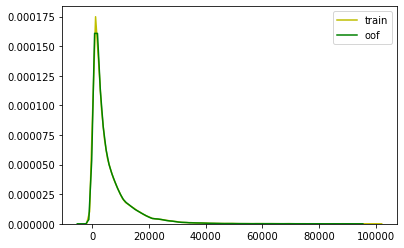

In [84]:
sns.distplot(labels, label='train', color='y', hist=False)
sns.distplot(oof, label='oof', color='g', hist=False)
# sns.distplot(sub['price'], label='test', color='r', hist=False)

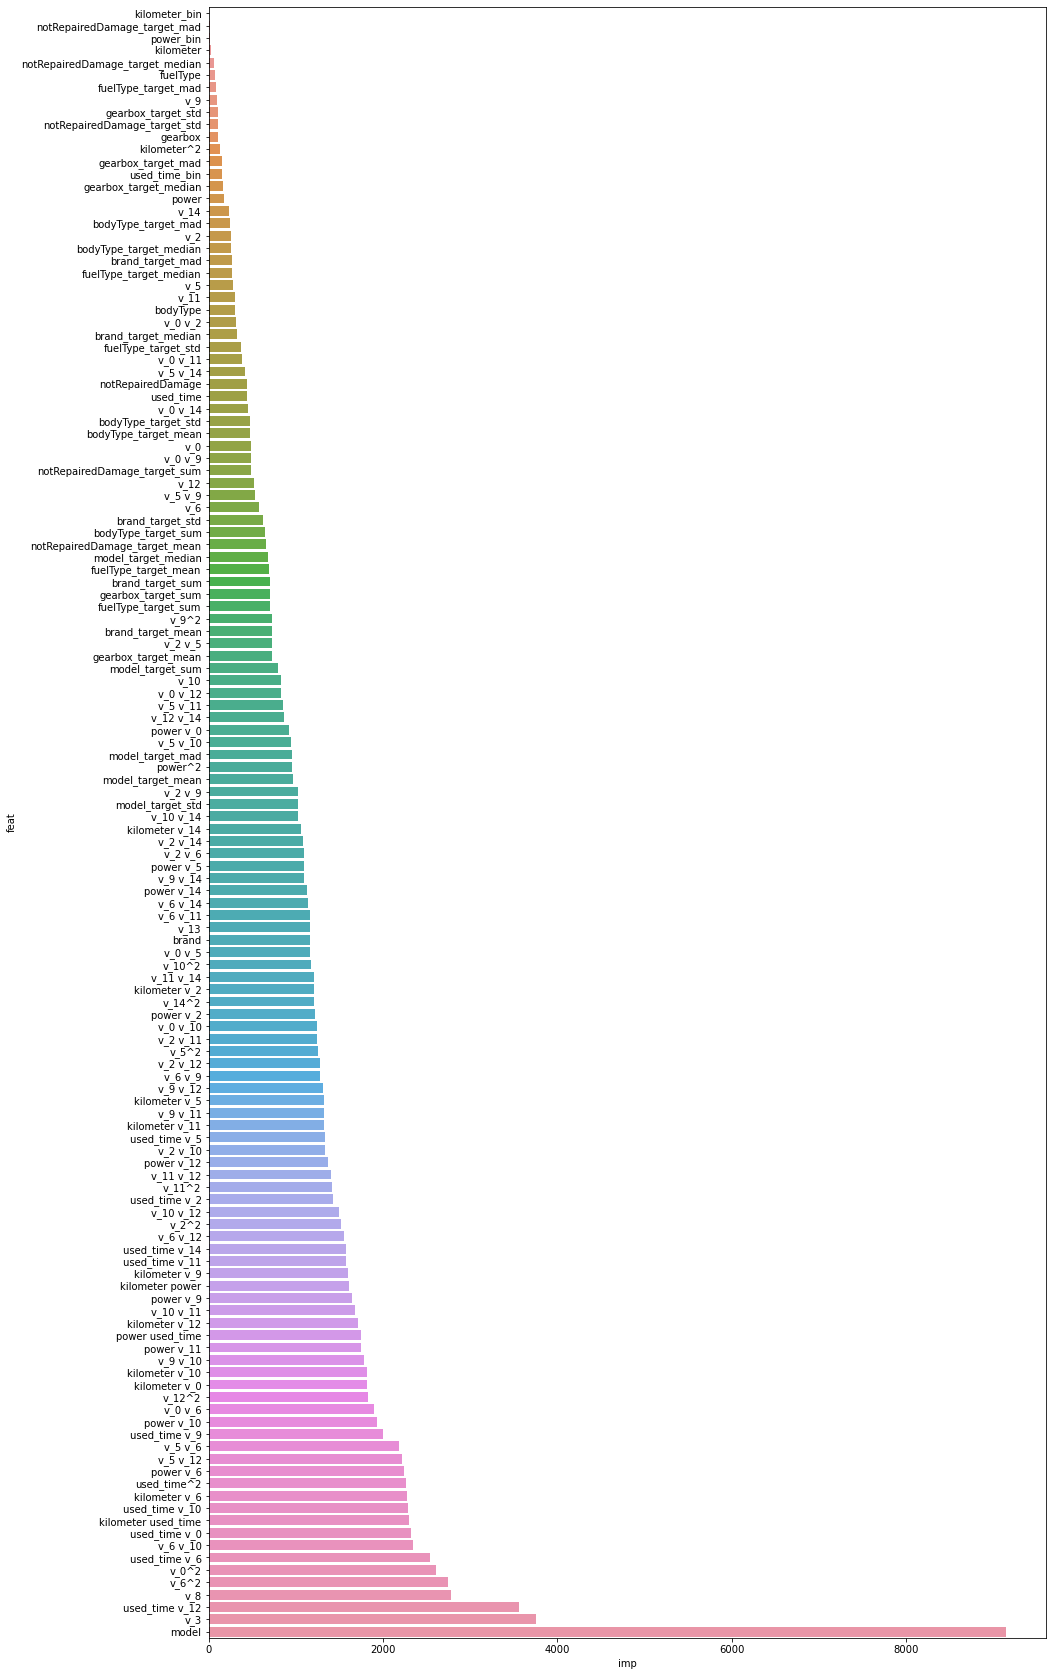

In [87]:
plt.figure(figsize=(15, 30))
feat_imp_df = feat_imp_df.sort_values('imp').reset_index(drop=True)
f = sns.barplot(x='imp', y='feat', data=feat_imp_df)
plt.savefig('1.jpg')

In [70]:
rest_df.shape

(148990, 90)

In [18]:
train1 = df1[~df1['price'].isnull()]

In [19]:
from lightgbm.sklearn import LGBMRegressor
from sklearn.model_selection import train_test_split
price = train['price_boxcox']
train_x,val_x,train_y,val_y = train_test_split(train1,price)
lgb1 = LGBMRegressor(n_estimators=2000,num_leaves=127,max_depth=10,early_stopping_round=50,metric=['l1'])
lgb1.fit(train_x,train_y,eval_set=[(val_x,val_y)],eval_metric='l1')

[1]	valid_0's l1: 1.73061
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 1.55756
[3]	valid_0's l1: 1.40182
[4]	valid_0's l1: 1.26162
[5]	valid_0's l1: 1.13544
[6]	valid_0's l1: 1.0219
[7]	valid_0's l1: 0.919711
[8]	valid_0's l1: 0.827756
[9]	valid_0's l1: 0.744974
[10]	valid_0's l1: 0.670472
[11]	valid_0's l1: 0.603419
[12]	valid_0's l1: 0.543089
[13]	valid_0's l1: 0.488773
[14]	valid_0's l1: 0.439894
[15]	valid_0's l1: 0.395906
[16]	valid_0's l1: 0.356314
[17]	valid_0's l1: 0.320695
[18]	valid_0's l1: 0.288641
[19]	valid_0's l1: 0.259782
[20]	valid_0's l1: 0.233812
[21]	valid_0's l1: 0.210424
[22]	valid_0's l1: 0.18939
[23]	valid_0's l1: 0.170454
[24]	valid_0's l1: 0.153434
[25]	valid_0's l1: 0.138123
[26]	valid_0's l1: 0.124348
[27]	valid_0's l1: 0.111961
[28]	valid_0's l1: 0.100839
[29]	valid_0's l1: 0.0908175
[30]	valid_0's l1: 0.0818027
[31]	valid_0's l1: 0.0737009
[32]	valid_0's l1: 0.0664139
[33]	valid_0's l1: 0.0598707
[34]	valid_0's l1: 0.053997

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              early_stopping_round=50, importance_type='split',
              learning_rate=0.1, max_depth=10, metric=['l1'],
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=2000, n_jobs=-1, num_leaves=127, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [20]:
lgb1.feature_importances_

array([ 138,  382, 3511, 2299,  355,  269,  397,  499,  442,  528,  331,
        355,  289,  214,  375,  444,  705,    4,    8,    0,    0,    4,
          2,    1,    1,   13,    0,    0,    1,    0,    2,    2,    0,
          4,    0,    0,    7,    0,    1,    8,    4,    1,    0,    2,
          0,    0,   11,   19,    9,    8,    1,    0,    0,    6,    0,
          0,    0,   11,    1,    0,    2,    1,    0,    0,    0,    3,
          2,    0,    1,    2,    1,    0,    2,    1,    2,    2,    0,
          0,    0,    0,   12,    0,    0,   18,    1,    4,    4,    1,
          0,    0,    8,    0,    0,    0,    6,    1,    0,    2,    0,
          1,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          3,    0,    0,    8,    0,    0,    0,    3,    0,    1,    0,
          4,    0,    2,    0,    1,    1,    0,    0,    0,    0,    0,
          1,    1,    0,    0,    0,    0,    1,    0,    6,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [31]:
feature = train1.columns[lgb1.feature_importances_>15]

In [22]:
from sklearn.preprocessing import PolynomialFeatures
numfea = ['kilometer','used_time'] + ['v_0','v_2','v_3','v_5','v_6','v_8','v_9','v_10','v_11','v_12','v_13','v_14']
poly = PolynomialFeatures()
poly_x = poly.fit_transform(df1[numfea])

In [23]:
print(poly_x.shape)

(198990, 120)


In [24]:
df0 = pd.DataFrame(poly_x, columns=poly.get_feature_names())

In [25]:
df2 = pd.concat([df1,df0],axis=1,ignore_index=True)

In [26]:
df2.shape

(198990, 573)

In [27]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572
0,12.5,60.0,1850.0,10.400,43.34,-2.880,2.8050,-2.420,0.7954,0.9146,0.05026,2.1600,0.2357,0.10200,0.02281,0.09750,4380.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1.0,12.5,4380.1,43.34,0.05026,2.1600,0.2357,0.10200,0.02281,0.09750,-2.880,2.8050,-2.420,0.7954,0.9146,156.25,54751.25,541.750,0.62825,27.00000,2.94625,1.27500,0.285125,1.218750,-36.00,35.0625,-30.2500,9.94250,11.4325,19185276.01,189833.534,220.143826,9461.01600,1032.38957,446.770200,99.910081,427.059750,-12614.6880,12286.18050,-10599.8420,3483.93154,4006.03946,1878.3556,2.178268,93.614400,10.215238,4.420680,0.988585,4.225650,-124.81920,121.568700,-104.88280,34.472636,39.638764,0.002526,0.108562,0.011846,0.005127,0.001146,0.004900,-0.144749,0.140979,-0.121629,0.039977,0.045968,4.665600,0.509112,0.220320,0.049270,0.210600,-6.220800,6.058800,-5.227200,1.718064,1.975536,0.055554,0.024041,0.005376,0.022981,-0.678816,0.661138,-0.570394,0.187476,0.215571,0.010404,0.002327,0.009945,-0.293760,0.286110,-0.246840,0.081131,0

In [33]:
train2 = df2[:148990]
from lightgbm.sklearn import LGBMRegressor
from sklearn.model_selection import train_test_split
price = train['price_boxcox']
train_x,val_x,train_y,val_y = train_test_split(train2,price)
lgb1 = LGBMRegressor(n_estimators=2000,num_leaves=127,max_depth=10,early_stopping_round=50,metric=['l1'])
lgb1.fit(train_x,train_y,eval_set=[(val_x,val_y)],eval_metric='l1')

[1]	valid_0's l1: 1.72181
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 1.54964
[3]	valid_0's l1: 1.39465
[4]	valid_0's l1: 1.25518
[5]	valid_0's l1: 1.12965
[6]	valid_0's l1: 1.01669
[7]	valid_0's l1: 0.915019
[8]	valid_0's l1: 0.823499
[9]	valid_0's l1: 0.741162
[10]	valid_0's l1: 0.667039
[11]	valid_0's l1: 0.60033
[12]	valid_0's l1: 0.540292
[13]	valid_0's l1: 0.486263
[14]	valid_0's l1: 0.437621
[15]	valid_0's l1: 0.393849
[16]	valid_0's l1: 0.354456
[17]	valid_0's l1: 0.318996
[18]	valid_0's l1: 0.287087
[19]	valid_0's l1: 0.258369
[20]	valid_0's l1: 0.232522
[21]	valid_0's l1: 0.209259
[22]	valid_0's l1: 0.188323
[23]	valid_0's l1: 0.16948
[24]	valid_0's l1: 0.152532
[25]	valid_0's l1: 0.137275
[26]	valid_0's l1: 0.123558
[27]	valid_0's l1: 0.11122
[28]	valid_0's l1: 0.10012
[29]	valid_0's l1: 0.0901287
[30]	valid_0's l1: 0.0811451
[31]	valid_0's l1: 0.0730622
[32]	valid_0's l1: 0.0657978
[33]	valid_0's l1: 0.059272
[34]	valid_0's l1: 0.05341
[35

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              early_stopping_round=50, importance_type='split',
              learning_rate=0.1, max_depth=10, metric=['l1'],
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=2000, n_jobs=-1, num_leaves=127, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [34]:
lgb1.feature_importances_

array([   6,  112, 3214, 2121,   77,   13,   26,   23,   26,   22,   18,
         18,   35,   37,   28,   28,  122,    3,    1,    0,    1,    3,
          0,    0,    0,    1,    0,    0,    1,    0,    6,    0,    0,
          0,    0,    0,    4,    0,    2,    3,    3,    0,    0,    0,
          0,    0,    5,    5,    0,    2,    0,    0,    0,    0,    0,
          0,    1,    8,    3,    0,    4,    0,    0,    0,    0,    2,
          1,    0,    0,    0,    0,    0,    0,    0,    0,    0,    1,
          1,    0,    0,    7,    0,    1,    7,    0,    1,    0,    0,
          0,    0,    1,    0,    0,    0,    0,    0,    0,    0,    0,
          1,    0,    0,    0,    1,    0,    0,    0,    0,    0,    0,
          1,    0,    0,    6,    0,    0,    0,    0,    0,    1,    0,
          0,    0,    0,    0,    0,    0,    1,    0,    0,    0,    0,
          1,    0,    0,    0,    4,    0,    0,    0,    2,    0,    0,
          0,    0,    0,    2,    0,    0,    0,   

In [40]:
f = train2.columns[lgb1.feature_importances_>50]

In [41]:
len(f)

40

In [ ]:
f

In [50]:
X_data1 = df2[f][:148990]
Y_data = np.log(train['price'])

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb
from sklearn.model_selection import KFold
## xgb-Model
xgr = xgb.XGBRegressor(n_estimators=120, learning_rate=0.1, gamma=0, subsample=0.8,\
        colsample_bytree=0.9, max_depth=7) #,objective ='reg:squarederror'

scores_train = []
scores = []

## 5折交叉验证方式
sk=KFold(n_splits=5,shuffle=True,random_state=0)
for train_ind,val_ind in sk.split(X_data1,Y_data):
    
    train_x=X_data1.iloc[train_ind].values
    train_y=Y_data.iloc[train_ind]
    val_x=X_data1.iloc[val_ind].values
    val_y=Y_data.iloc[val_ind]
    
    xgr.fit(train_x,train_y)
    pred_train_xgb=xgr.predict(train_x)
    pred_xgb=xgr.predict(val_x)
    
    score_train = mean_absolute_error(np.exp(train_y),np.exp(pred_train_xgb))
    scores_train.append(score_train)
    score = mean_absolute_error(np.exp(val_y),np.exp(pred_xgb))
    scores.append(score)

print('Train mae:',np.mean(score_train))
print('Val mae',np.mean(scores))

Train mae: 10.899307193568092
Val mae 10.809581654432826


In [52]:
def build_model_xgb(x_train,y_train):
    model = xgb.XGBRegressor(n_estimators=150, learning_rate=0.1, gamma=0, subsample=0.8,\
        colsample_bytree=0.9, max_depth=7) #, objective ='reg:squarederror'
    model.fit(x_train, y_train)
    return model

def build_model_lgb(x_train,y_train):
    estimator = lgb.LGBMRegressor(num_leaves=127,n_estimators = 150)
    param_grid = {
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
    }
    gbm = GridSearchCV(estimator, param_grid)
    gbm.fit(x_train, y_train)
    return gbm

In [53]:
## Split data with val
x_train1,x_val1,y_train1,y_val1 = train_test_split(X_data1,Y_data,test_size=0.3,random_state=2020)

In [54]:
X_test = df2[f][148990:]

In [57]:
from sklearn.model_selection import GridSearchCV,cross_val_score
import lightgbm as lgb
print('Train lgb...')
model_lgb = build_model_lgb(x_train1,y_train1)
val_lgb = model_lgb.predict(x_val1)
MAE_lgb = mean_absolute_error(np.exp(y_val1),np.exp(val_lgb))
print('MAE of val with lgb:',MAE_lgb)

print('Predict lgb...')
model_lgb_pre = build_model_lgb(X_data1,Y_data)
subA_lgb = model_lgb_pre.predict(X_test)
print('Sta of Predict lgb:')
Sta_inf(subA_lgb)

Train lgb...
MAE of val with lgb: 19.404259955616148
Predict lgb...
Sta of Predict lgb:


NameError: name 'Sta_inf' is not defined

In [58]:
## 定义了一个统计函数，方便后续信息统计
def Sta_inf(data):
    print('_min',np.min(data))
    print('_max:',np.max(data))
    print('_mean',np.mean(data))
    print('_ptp',np.ptp(data))
    print('_std',np.std(data))
    print('_var',np.var(data))

In [59]:
Sta_inf(subA_lgb)

_min 2.672256231430993
_max: 4.624413564522196
_mean 3.9720504773612024
_ptp 1.9521573330912028
_std 0.20839008347655844
_var 0.043426426891367


In [70]:
np.exp(subA_lgb)

array([60.22587122, 73.31043762, 47.82962345, ..., 51.1416119 ,
       59.62044527, 57.63306415])

In [60]:
print('Train xgb...')
model_xgb = build_model_xgb(x_train1,y_train1)
val_xgb = model_xgb.predict(x_val1)
MAE_xgb = mean_absolute_error(np.exp(y_val1),np.exp(val_xgb))
print('MAE of val with xgb:',MAE_xgb)

print('Predict xgb...')
model_xgb_pre = build_model_xgb(X_data1,Y_data)
subA_xgb = model_xgb_pre.predict(X_test)
print('Sta of Predict xgb:')
# Sta_inf(subA_xgb)

Train xgb...
MAE of val with xgb: 9.75573244768443
Predict xgb...
Sta of Predict xgb:


In [61]:
Sta_inf(subA_xgb)

_min 2.3974266
_max: 2.407032
_mean 2.4018452
_ptp 0.009605408
_std 0.0008394069
_var 7.0460396e-07


In [63]:
## 这里我们采取了简单的加权融合的方式
val_Weighted = (1-MAE_lgb/(MAE_xgb+MAE_lgb))*val_lgb+(1-MAE_xgb/(MAE_xgb+MAE_lgb))*val_xgb
val_Weighted[val_Weighted<0]=10 # 由于我们发现预测的最小值有负数，而真实情况下，price为负是不存在的，由此我们进行对应的后修正
print('MAE of val with Weighted ensemble:',mean_absolute_error(np.exp(y_val1),np.exp(val_Weighted)))

MAE of val with Weighted ensemble: 9.59274307287701


In [64]:
val_Weighted

array([8.6128244 , 9.66140056, 9.74002897, ..., 8.82390176, 9.84933383,
       8.03966736])

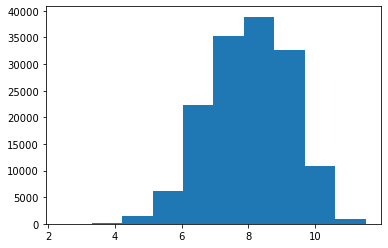

In [65]:
sub_Weighted = (1-MAE_lgb/(MAE_xgb+MAE_lgb))*subA_lgb+(1-MAE_xgb/(MAE_xgb+MAE_lgb))*subA_xgb

## 查看预测值的统计进行
plt.hist(Y_data)
plt.show()
plt.close()

In [69]:
sub_Weighted

array([2.97083504, 3.03449545, 2.89230173, ..., 2.91502687, 2.9667124 ,
       2.95445116])

In [68]:
sub = pd.DataFrame()
sub['SaleID'] = test.SaleID
sub['price'] = np.exp(np.exp(sub_Weighted))
path = 'I:/old_cars/data/'
sub.to_csv(path + '1.csv',index=False)

In [ ]:
from scipy.stats import entropy
# import tqdm

feat_cols = []

### count编码
# for f in ['model','brand','city','body_Type','fuelType','gearbox']:
#     df[f + '_count'] = df[f].map(df[f].value_counts())
#     feat_cols.append(f + '_count')
#     print(feat_cols)
### 用数值特征对类别特征做统计刻画，随便挑了几个跟price相关性最高的匿名特征
for f1 in ['model', 'brand', 'city']:
    g = df1.groupby(f1, as_index=False)
#     print('这是g:',g)
    for f2 in ['v_0', 'v_3', 'v_8', 'v_12']:
        feat = g[f2].agg({
            '{}_{}_max'.format(f1, f2): 'max', '{}_{}_min'.format(f1, f2): 'min',
            '{}_{}_median'.format(f1, f2): 'median', '{}_{}_mean'.format(f1, f2): 'mean',
            '{}_{}_std'.format(f1, f2): 'std', '{}_{}_mad'.format(f1, f2): 'mad'
        })
        df = df.merge(feat, on=f1, how='left')
        feat_list = list(feat)
        feat_list.remove(f1)
        feat_cols.extend(feat_list)


## 类别特征的二阶交叉
for f_pair in [['model', 'brand'], ['model', 'city'], ['brand', 'city']]:
    ### 共现次数
    df1['_'.join(f_pair) + '_count'] = df1.groupby(f_pair)['SaleID'].transform('count')
    ### n unique、熵
    df1 = df1.merge(df.groupby(f_pair[0], as_index=False)[f_pair[1]].agg({
        '{}_{}_nunique'.format(f_pair[0], f_pair[1]): 'nunique',
        '{}_{}_ent'.format(f_pair[0], f_pair[1]): lambda x: entropy(x.value_counts() / x.shape[0])
    }), on=f_pair[0], how='left')
    df1 = df1.merge(df.groupby(f_pair[1], as_index=False)[f_pair[0]].agg({
        '{}_{}_nunique'.format(f_pair[1], f_pair[0]): 'nunique',
        '{}_{}_ent'.format(f_pair[1], f_pair[0]): lambda x: entropy(x.value_counts() / x.shape[0])
    }), on=f_pair[1], how='left')
    ### 比例偏好
    df1['{}_in_{}_prop'.format(f_pair[0], f_pair[1])] = df1['_'.join(f_pair) + '_count'] / df1[f_pair[1] + '_count']
    df1['{}_in_{}_prop'.format(f_pair[1], f_pair[0])] = df1['_'.join(f_pair) + '_count'] / df1[f_pair[0] + '_count']
    
    feat_cols.extend([
        '_'.join(f_pair) + '_count',
        '{}_{}_nunique'.format(f_pair[0], f_pair[1]), '{}_{}_ent'.format(f_pair[0], f_pair[1]),
        '{}_{}_nunique'.format(f_pair[1], f_pair[0]), '{}_{}_ent'.format(f_pair[1], f_pair[0]),
        '{}_in_{}_prop'.format(f_pair[0], f_pair[1]), '{}_in_{}_prop'.format(f_pair[1], f_pair[0])
    ])

In [ ]:
# from category_encoders import OneHotEncoder
# 该包需要下载，所以用pd自带的get_dummies()/或者sklearn.preprocessingd的OneHotEncoder（）


In [73]:
df2[f].shape

(198990, 40)